In [1]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier

from data_utils import *
from models_utils import *
from pkl_utils import *

from numpy.random import choice

Preparing data

In [3]:
df = get_raw_data('../data/allNamesClean.csv')

In [4]:
df_translit_ru = filter_data(df)

In [5]:
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru)

In [6]:
# Predict class for each sample with probability proportional to number of occurances of class in training set
class RndClf:
    def __init__(self, y_train):
        self.classes = list(range(len(np.unique(y_train))))
        self.probs = [(y_train == i).sum() / len(y_train) for i in self.classes]
    
    def predict(self, X):
        return choice(self.classes, len(X),
              p=self.probs)

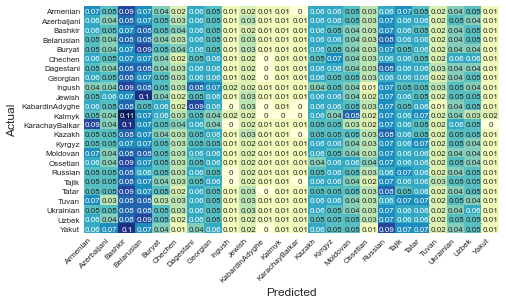

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9016	0.0583	0.0663	0.0621
Azerbaijani    	0.9139	0.0349	0.0387	0.0367
Bashkir        	0.8544	0.0732	0.0734	0.0733
Belarusian     	0.8547	0.0841	0.0771	0.0805
Buryat         	0.9183	0.0445	0.0494	0.0468
Chechen        	0.9418	0.0181	0.0171	0.0176
Dagestani      	0.9028	0.0489	0.0622	0.0547
Georgian       	0.8971	0.0621	0.0605	0.0613
Ingush         	0.9847	0.0163	0.0171	0.0167
Jewish         	0.9518	0.0270	0.0256	0.0263
KabardinAdyghe 	0.9862	0.0040	0.0035	0.0038
Kalmyk         	0.9788	0.0000	0.0000	0.0000
KarachayBalkar 	0.9862	0.0082	0.0068	0.0075
Kazakh         	0.8889	0.0613	0.0548	0.0579
Kyrgyz         	0.8919	0.0652	0.0613	0.0632
Moldovan       	0.9087	0.0480	0.0427	0.0452
Ossetian       	0.9455	0.0403	0.0422	0.0412
Russian        	0.8707	0.0608	0.0632	0.0620
Tajik          	0.8838	0.0594	0.0587	0.0591
Tatar          	0.8932	0.0542	0.0602	0.0570
Tuvan          	0.9601	0.0185	0.0200	0.0192
Ukrainian      	0.9060	0.0482	0.0413	0.0445


{'accuracy': 0.05316211710773078,
 'precision macro': 0.04128717964478552,
 'recall macro': 0.04142069245268249,
 'f1 macro': 0.04124922257903403}

In [7]:
test_model(RndClf(y_train), le, X_test, y_test, 'cm_rnd_full.tif')

In [8]:
df_agr = df
df_agr.ethn = df.ethn.apply(aggregate_ethnos)
df_translit_ru_agr = filter_data(df_agr)

In [9]:
le_a, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr)

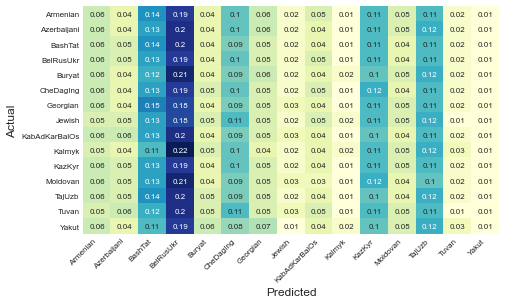

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.8988	0.0498	0.0580	0.0536
Azerbaijani    	0.9147	0.0352	0.0379	0.0365
BashTat        	0.7699	0.1356	0.1380	0.1368
BelRusUkr      	0.6809	0.2020	0.1949	0.1984
Buryat         	0.9184	0.0404	0.0441	0.0422
CheDagIng      	0.8382	0.0868	0.0998	0.0929
Georgian       	0.8967	0.0569	0.0546	0.0557
Jewish         	0.9519	0.0177	0.0164	0.0170
KabAdKarBalOs  	0.9178	0.0440	0.0434	0.0437
Kalmyk         	0.9792	0.0162	0.0183	0.0172
KazKyr         	0.7955	0.1208	0.1097	0.1150
Moldovan       	0.9088	0.0498	0.0442	0.0468
TajUzb         	0.8001	0.1214	0.1178	0.1196
Tuvan          	0.9602	0.0087	0.0095	0.0091
Yakut          	0.9832	0.0098	0.0087	0.0092


{'accuracy': 0.10715774119608251,
 'precision macro': 0.06633515600104857,
 'recall macro': 0.06635256433520936,
 'f1 macro': 0.06623800650025562}

In [10]:
test_model(RndClf(y_train_a), le_a, X_test_a, y_test_a, 'cm_rnd_agr.tif')